In [31]:
#Hachaton Project
#Energy consumtion forecasting project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import tensorflow 

# Load data
data = pd.read_csv("Load_data_new.csv")
data["Time"] = pd.to_datetime(data["Time"])
data.set_index("Time", inplace=True)

replacement_dict = {
    "no clouds": 0,
    "2/10–3/10.": 3,
    "7/10 – 8/10.": 8,
    "10/10.": 10,
    "4/10.": 4,
    "5/10.": 5,
    "Sky obscured by fog and/or other meteorological phenomena.": 10,
}
data['total_cloud_cover[from ten]'] = data['total_cloud_cover[from ten]'].replace(replacement_dict).astype('float64')


data['hour'] = data.index.hour
data['day_of_year'] = data.index.dayofyear
data['day_of_month'] = data.index.day
data['month'] = data.index.month
data['year'] = data.index.year


num_lags = 3
for i in range(1, num_lags+1):
    data[f'electricity_consumption_lag_{i}'] = data['electricity_demand_values[kw]'].shift(i)
    data[f'heat_consumption_lag_{i}'] = data['heat_demand_values[kw]'].shift(i)

data['electricity_rolling_mean'] = data['electricity_demand_values[kw]'].rolling(window=3).mean()
data['heat_rolling_mean'] = data['heat_demand_values[kw]'].rolling(window=3).mean()


data = data.dropna()

# Save the preprocessed data
data.to_csv("preprocessed_data1.csv", index=True) 

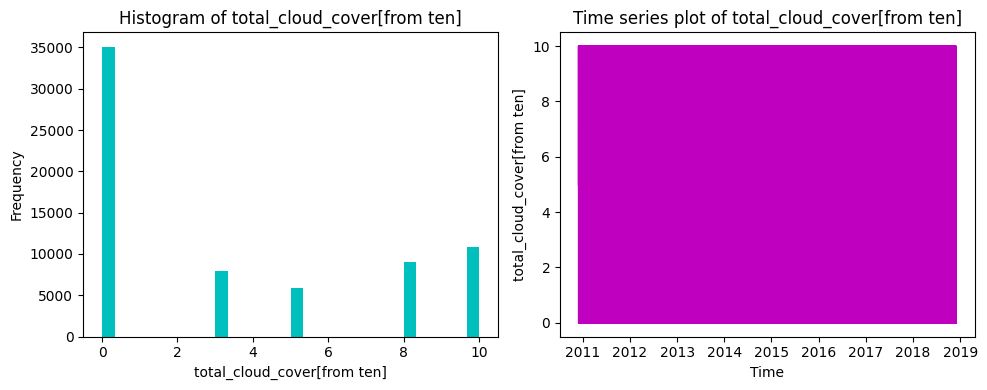

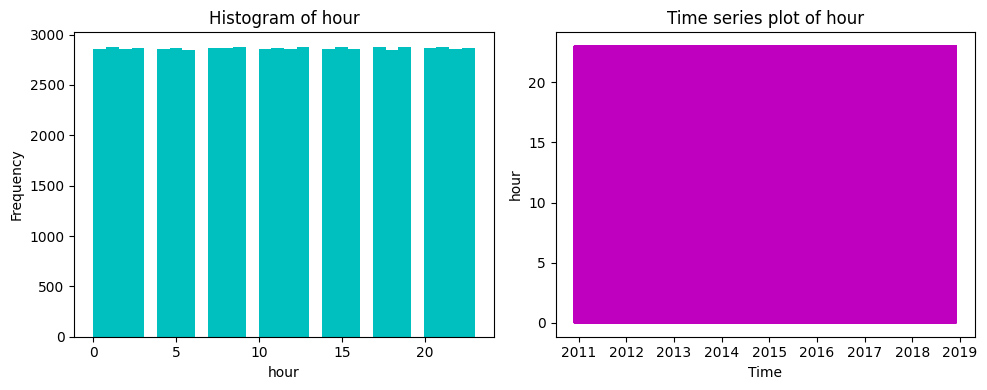

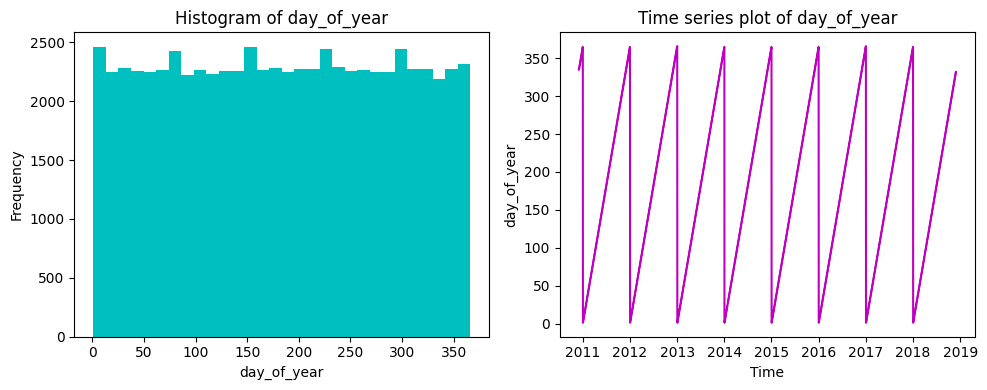

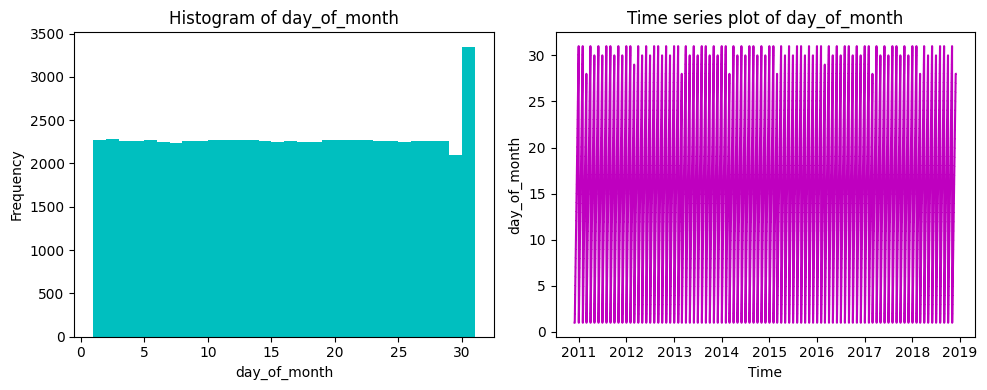

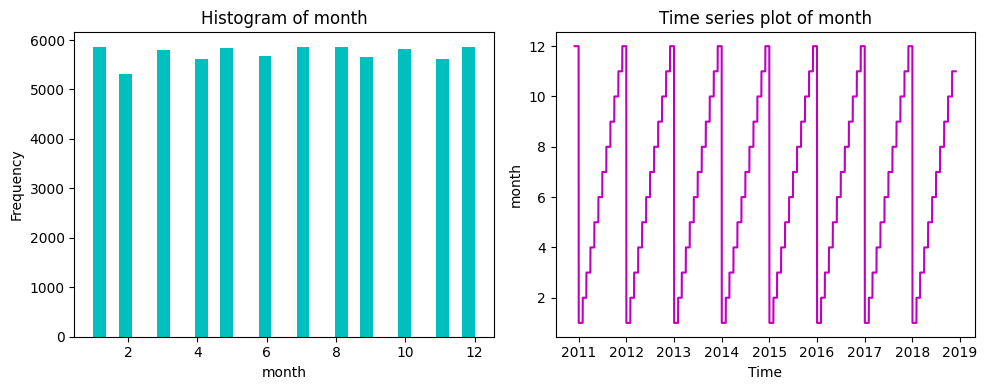

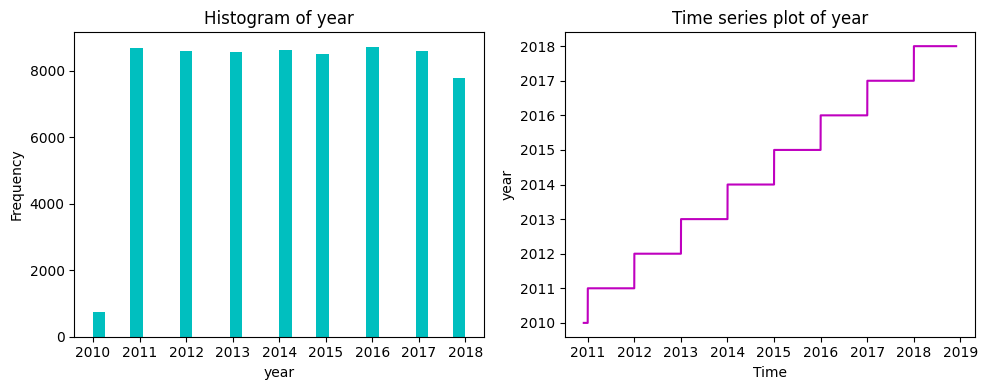

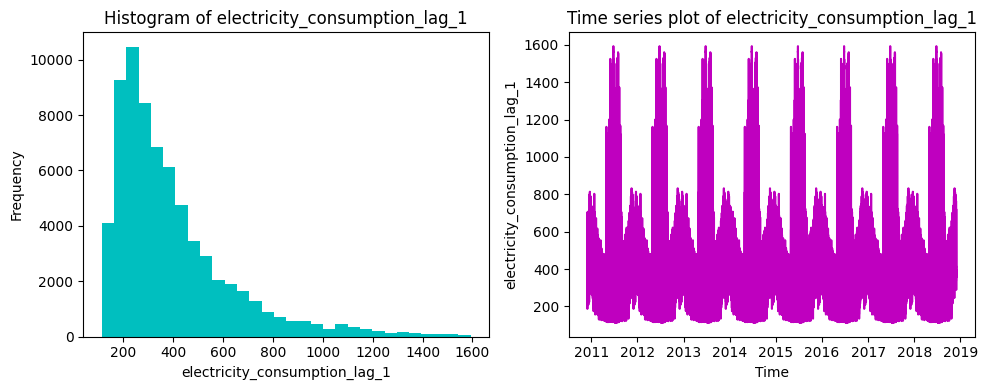

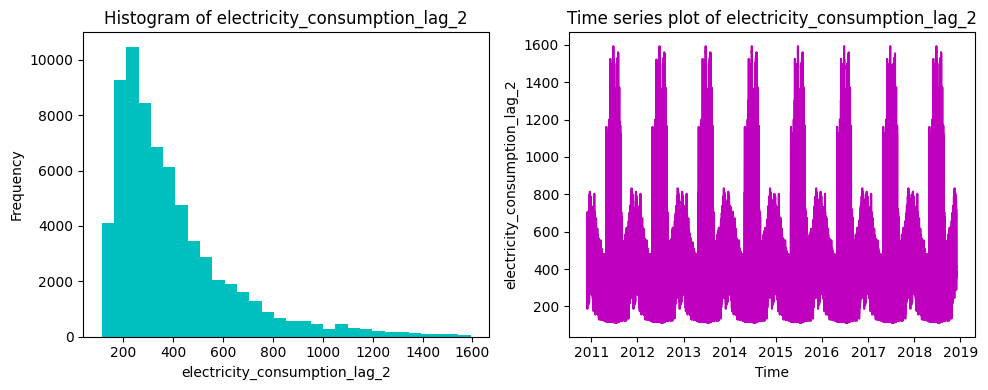

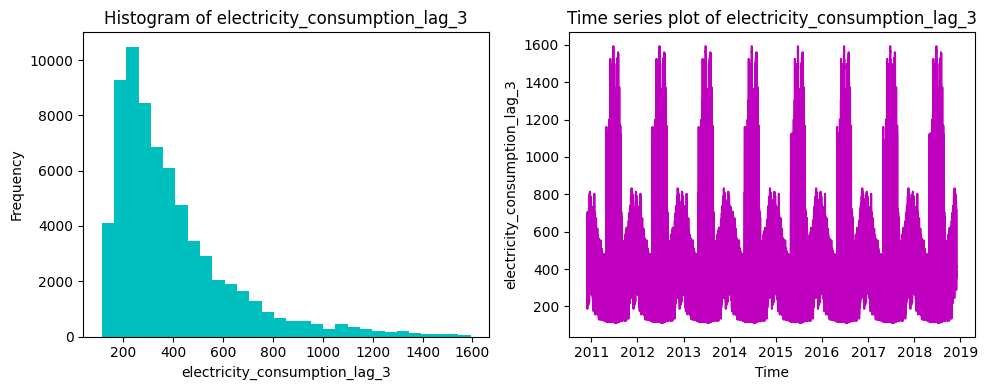

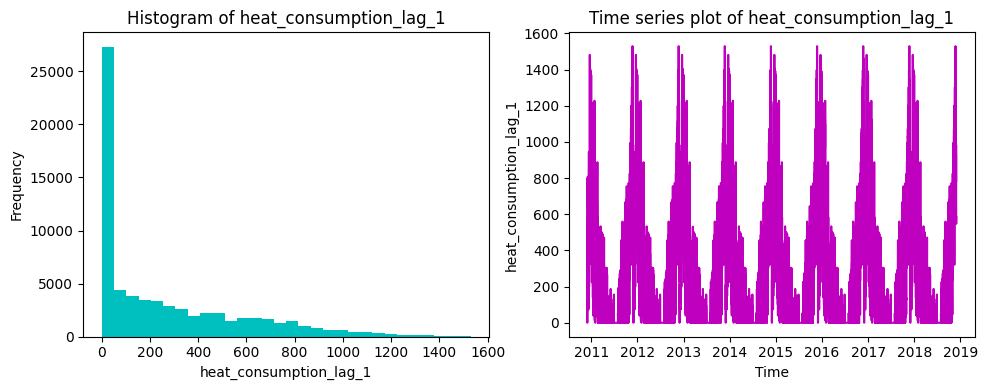

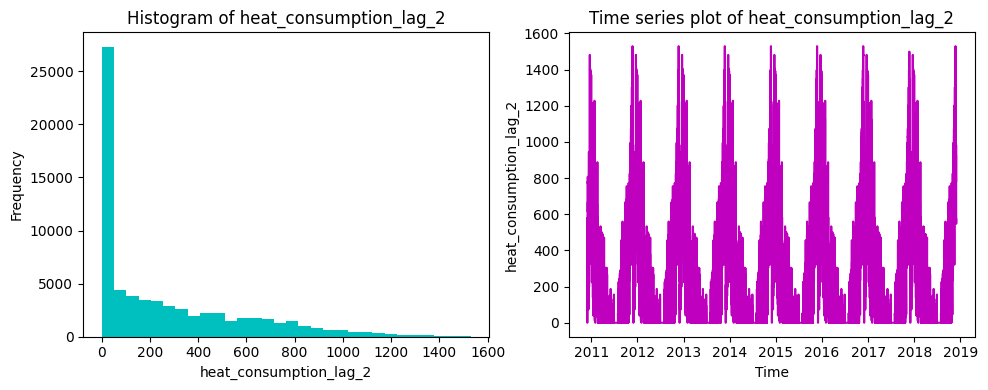

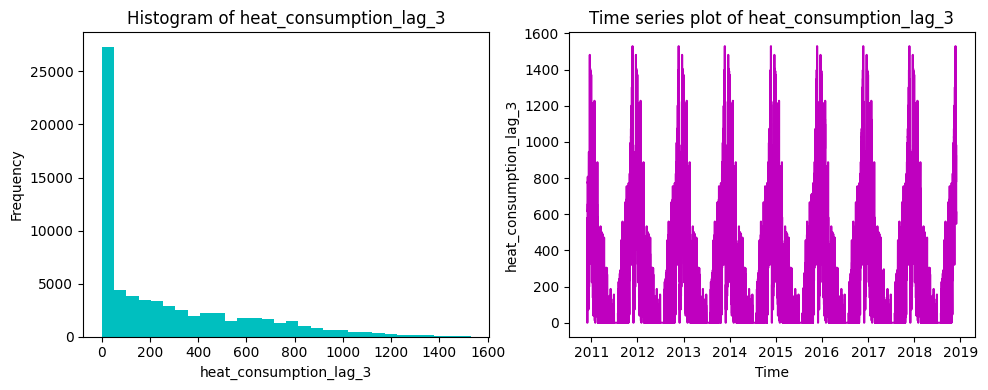

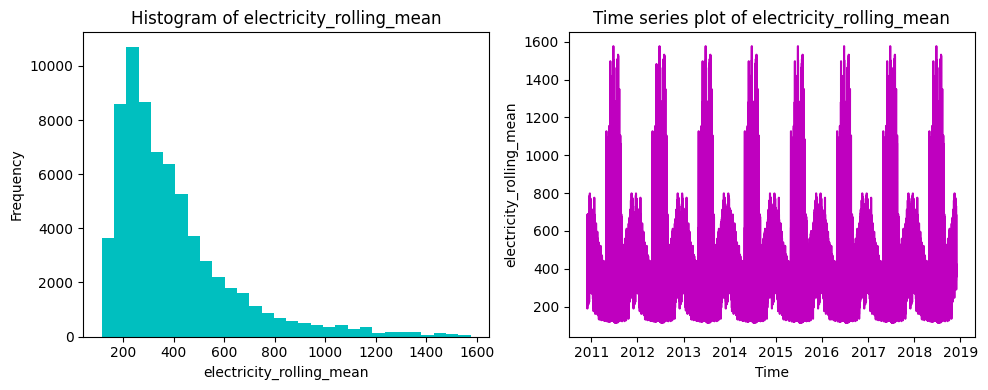

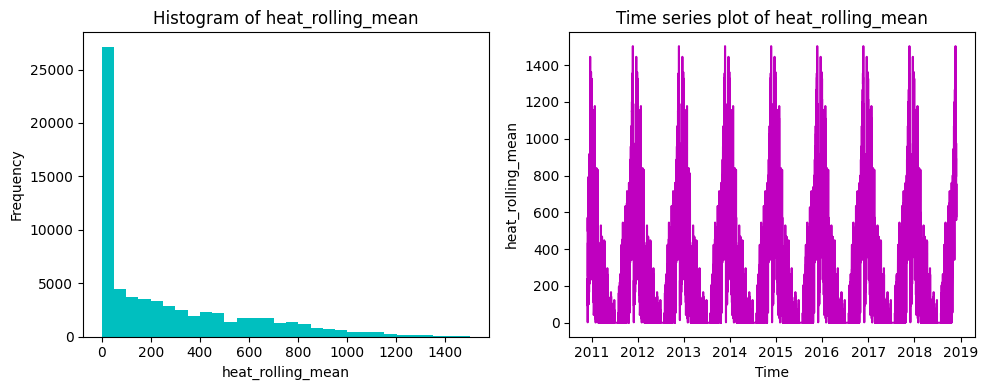

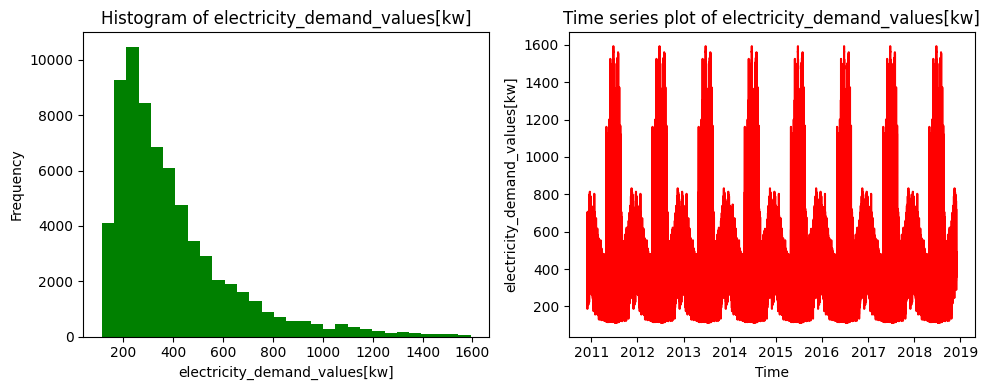

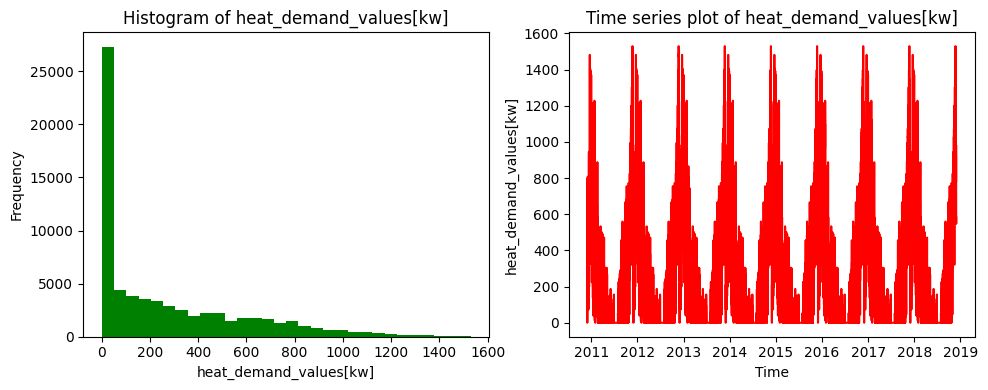

In [32]:
import matplotlib.pyplot as plt

# Load preprocessed data if you haven't already
data = pd.read_csv("preprocessed_data1.csv", parse_dates=['Time'])
data.set_index("Time", inplace=True)

# List of features and target variables
feature_vars = ['total_cloud_cover[from ten]', 'hour', 'day_of_year', 'day_of_month', 'month', 'year', 
                'electricity_consumption_lag_1', 'electricity_consumption_lag_2', 'electricity_consumption_lag_3', 
                'heat_consumption_lag_1', 'heat_consumption_lag_2', 'heat_consumption_lag_3',
                'electricity_rolling_mean', 'heat_rolling_mean']
target_vars = ['electricity_demand_values[kw]', 'heat_demand_values[kw]']

# Plotting feature variables
for var in feature_vars:
    plt.figure(figsize=(10, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(data[var], bins=30, color='c')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    
    # Time series plot
    plt.subplot(1, 2, 2)
    plt.plot(data.index, data[var], color='m')
    plt.title(f'Time series plot of {var}')
    plt.xlabel('Time')
    plt.ylabel(var)
    
    plt.tight_layout()
    plt.show()

# Plotting target variables
for var in target_vars:
    plt.figure(figsize=(10, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(data[var], bins=30, color='g')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    
    # Time series plot
    plt.subplot(1, 2, 2)
    plt.plot(data.index, data[var], color='r')
    plt.title(f'Time series plot of {var}')
    plt.xlabel('Time')
    plt.ylabel(var)
    
    plt.tight_layout()
    plt.show()


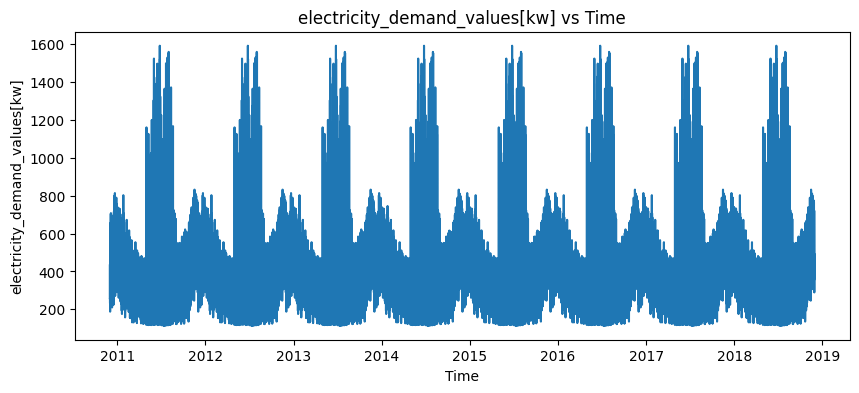

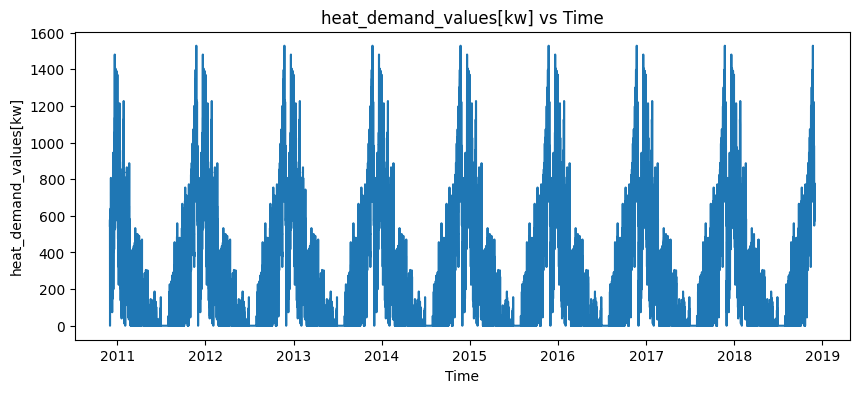

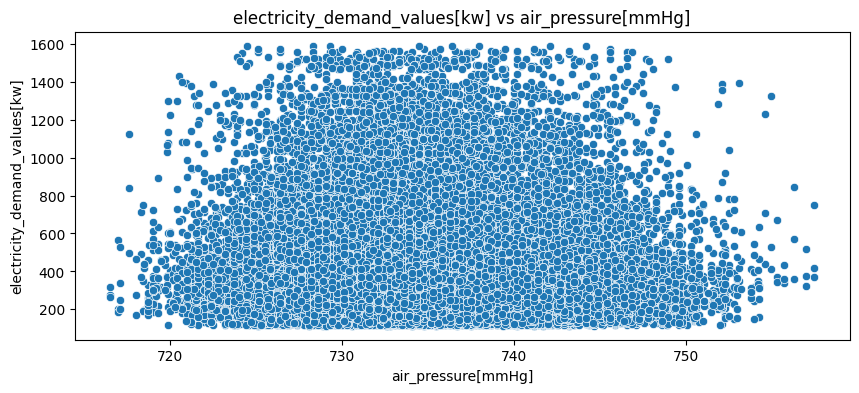

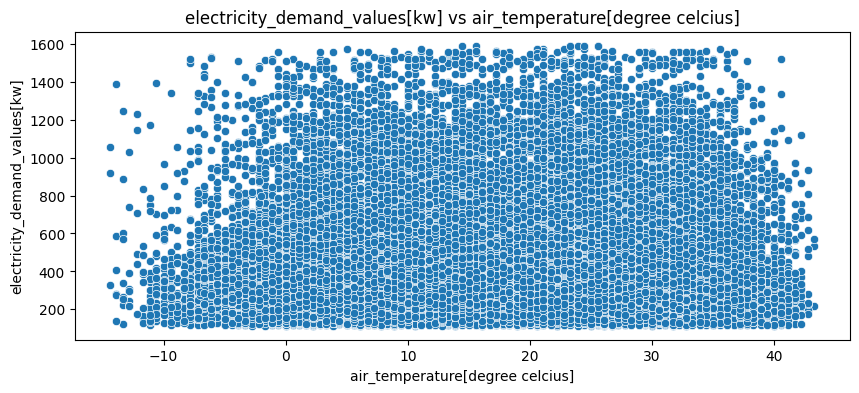

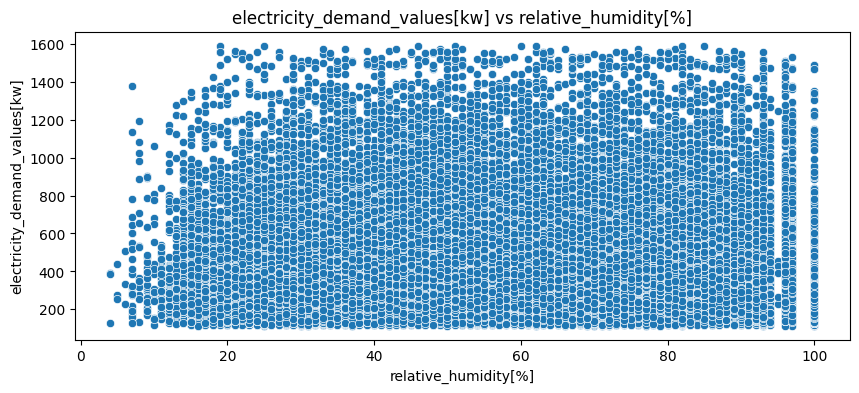

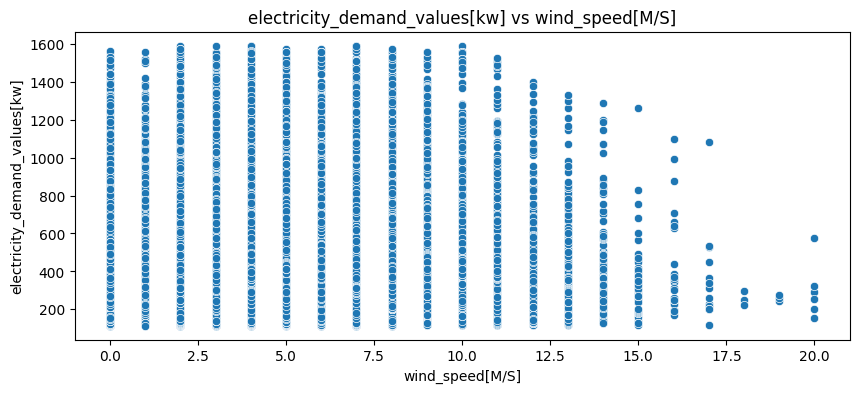

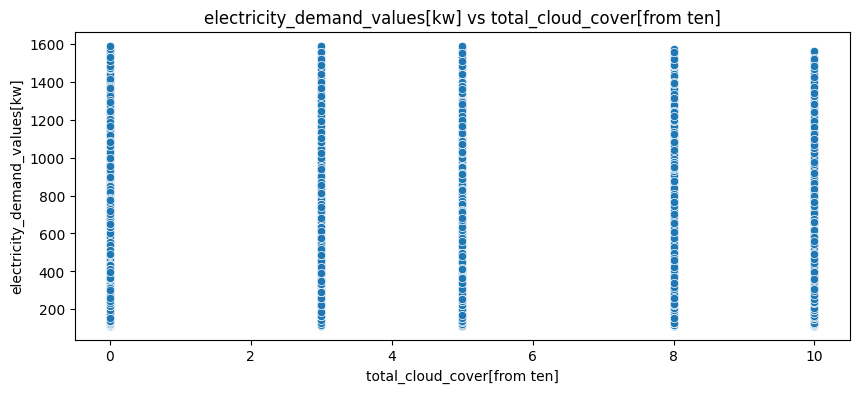

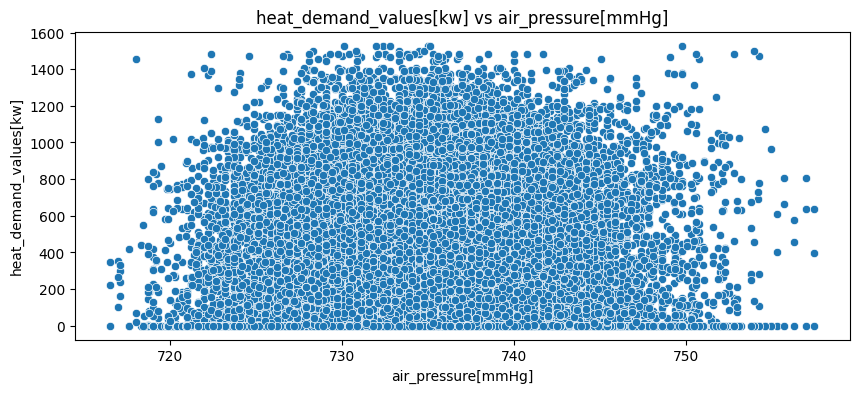

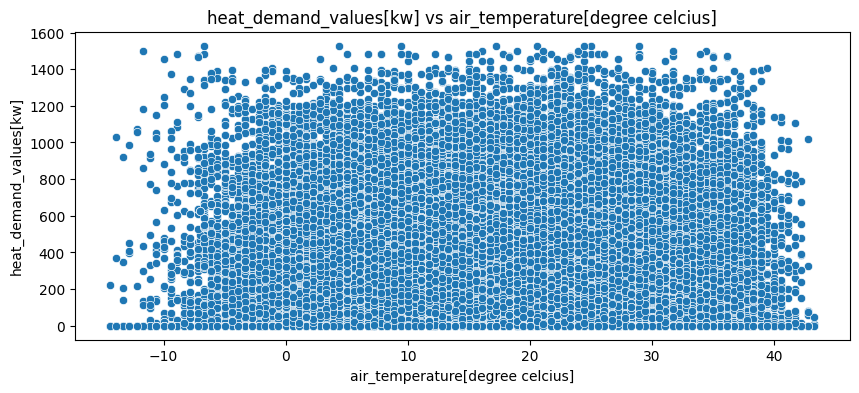

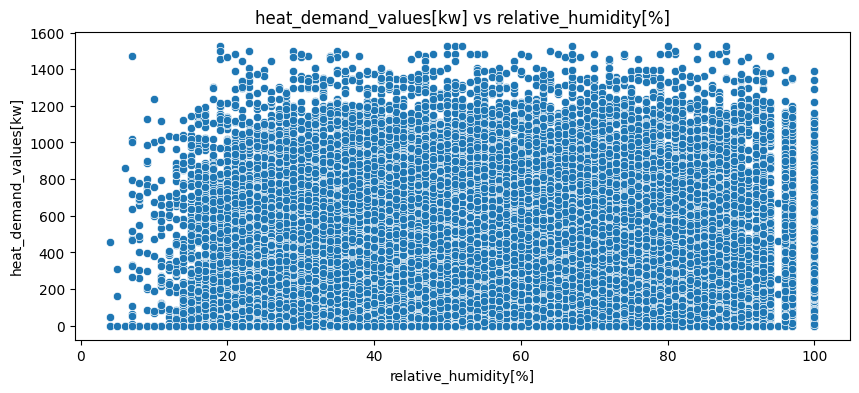

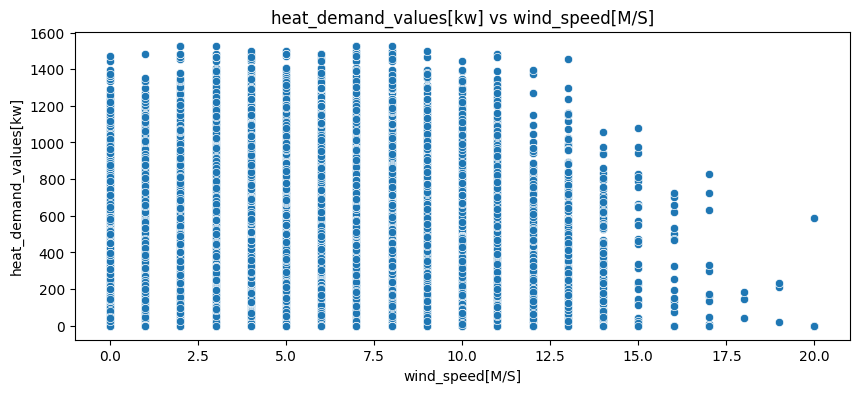

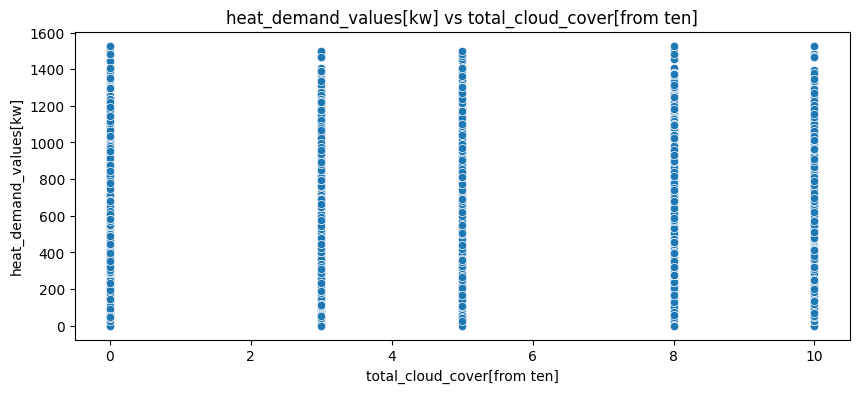

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of target variables
target_vars = ['electricity_demand_values[kw]', 'heat_demand_values[kw]']

# List of feature variables (excluding 'Time' which is the index)
feature_vars = ['air_pressure[mmHg]', 'air_temperature[degree celcius]', 'relative_humidity[%]', 'wind_speed[M/S]', 'total_cloud_cover[from ten]']

# First, plot Time vs. Target variables (since Time is the index)
for target in target_vars:
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=data, x=data.index, y=target)
    plt.xlabel('Time')
    plt.ylabel(target)
    plt.title(f"{target} vs Time")
    plt.show()

# Now plot feature variables vs target variables
for target in target_vars:
    for feature in feature_vars:
        plt.figure(figsize=(10, 4))
        sns.scatterplot(data=data, x=feature, y=target)
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title(f"{target} vs {feature}")
        plt.show()


In [14]:
# Data normalization
from sklearn.preprocessing import MinMaxScaler
data = data.reset_index()
data = data.drop(columns=["Time"])
scaler = MinMaxScaler(feature_range=(0, 1))
data_norm = scaler.fit_transform(data)

In [16]:
#Split the dataset into training, validation, and testing sets
train_size = int(len(data_norm) * 0.6)
val_size = int(len(data_norm) * 0.2)
test_size = len(data_norm) - train_size - val_size
train, val, test = data_norm[:train_size, :], data_norm[train_size:train_size+val_size, :], data_norm[train_size+val_size:, :]

Epoch 1/50
573/573 - 28s - loss: 0.0144 - val_loss: 0.0074 - lr: 0.0010 - 28s/epoch - 49ms/step
Epoch 2/50
573/573 - 17s - loss: 0.0053 - val_loss: 0.0045 - lr: 0.0010 - 17s/epoch - 30ms/step
Epoch 3/50
573/573 - 17s - loss: 0.0036 - val_loss: 0.0032 - lr: 0.0010 - 17s/epoch - 30ms/step
Epoch 4/50
573/573 - 17s - loss: 0.0028 - val_loss: 0.0023 - lr: 0.0010 - 17s/epoch - 30ms/step
Epoch 5/50
573/573 - 17s - loss: 0.0022 - val_loss: 0.0015 - lr: 0.0010 - 17s/epoch - 29ms/step
Epoch 6/50
573/573 - 18s - loss: 0.0017 - val_loss: 0.0010 - lr: 0.0010 - 18s/epoch - 32ms/step
Epoch 7/50
573/573 - 25s - loss: 0.0014 - val_loss: 8.4068e-04 - lr: 0.0010 - 25s/epoch - 44ms/step
Epoch 8/50
573/573 - 22s - loss: 0.0012 - val_loss: 6.6257e-04 - lr: 0.0010 - 22s/epoch - 39ms/step
Epoch 9/50
573/573 - 19s - loss: 0.0011 - val_loss: 4.4485e-04 - lr: 0.0010 - 19s/epoch - 33ms/step
Epoch 10/50
573/573 - 18s - loss: 9.1977e-04 - val_loss: 4.2200e-04 - lr: 0.0010 - 18s/epoch - 31ms/step
Epoch 11/50
573/573

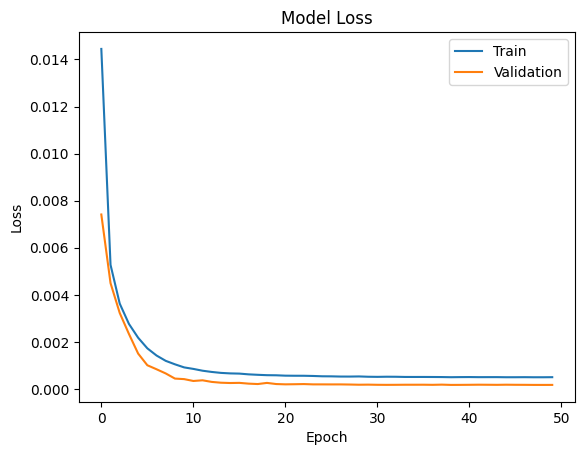

In [37]:
import tensorflow.keras as keras
# RNN model
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back), :-2])
        dataY.append(dataset[i + look_back, -2:])
    return np.array(dataX), np.array(dataY)

look_back = 24
X_train, y_train = create_dataset(train, look_back)
X_val, y_val = create_dataset(val, look_back)
X_test, y_test = create_dataset(test, look_back)


#Hyperparameters 
# Define the RNN model architecture(hyperparameters)
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back), :-2])
        dataY.append(dataset[i + look_back, -2:])
    return np.array(dataX), np.array(dataY)

# Generate input and output data
look_back = 24
X_train, y_train = create_dataset(train, look_back)
X_val, y_val = create_dataset(val, look_back)
X_test, y_test = create_dataset(test, look_back)

# Define the RNN model architecture(hyperparameters)
model = Sequential()
model.add(LSTM(10, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(10, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(10))
model.add(Dense(2))

# Compile the RNN model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
# Define a learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9

callback = keras.callbacks.LearningRateScheduler(scheduler)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_val, y_val), callbacks=[callback], verbose=2)
# Plot training and validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate and make predictions
y_pred = model.predict(X_test)
# Calculate RMSE
rmse_electricity = np.sqrt(mean_squared_error(y_test[:, 0], y_pred[:, 0]))
rmse_heat = np.sqrt(mean_squared_error(y_test[:, 1], y_pred[:, 1]))
print(f"RMSE for electricity demand: {rmse_electricity}")
print(f"RMSE for heat demand: {rmse_heat}")

430/430 [==============================] - 4s 10ms/step
RMSE for electricity demand: 0.017165669723503935
RMSE for heat demand: 0.014198041868423498


In [40]:
mae_electricity = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
mae_heat = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
r2_electricity = r2_score(y_test[:, 0], y_pred[:, 0])
r2_heat = r2_score(y_test[:, 1], y_pred[:, 1])

print(f"R-squared for electricity demand: {r2_electricity}")
print(f"R-squared for heat demand: {r2_heat}")
print(f"MAE for electricity demand: {mae_electricity}")
print(f"MAE for heat demand: {mae_heat}")

R-squared for electricity demand: 0.9899785200784045
R-squared for heat demand: 0.9952302819252885
MAE for electricity demand: 0.012343301223519995
MAE for heat demand: 0.009205287332783104


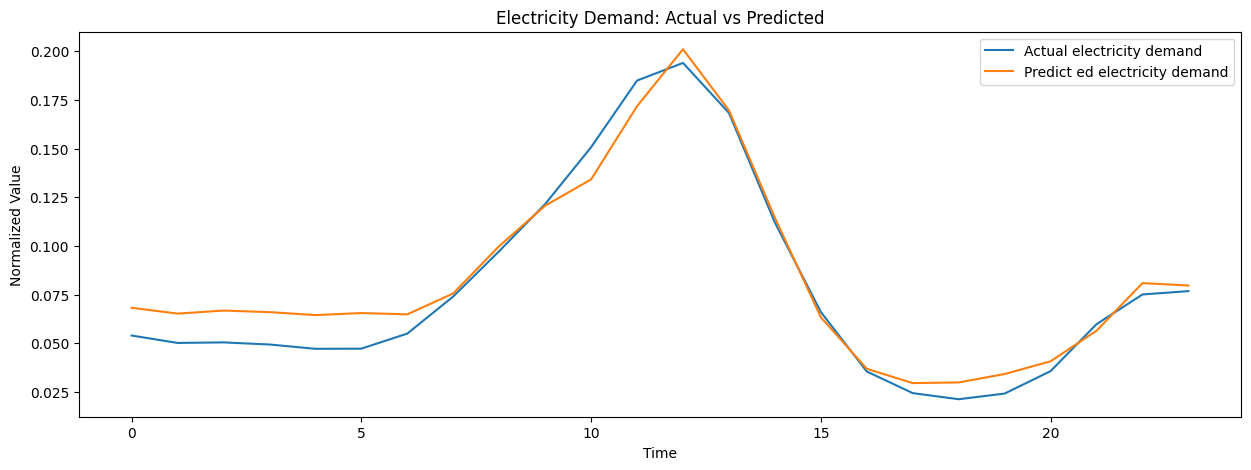

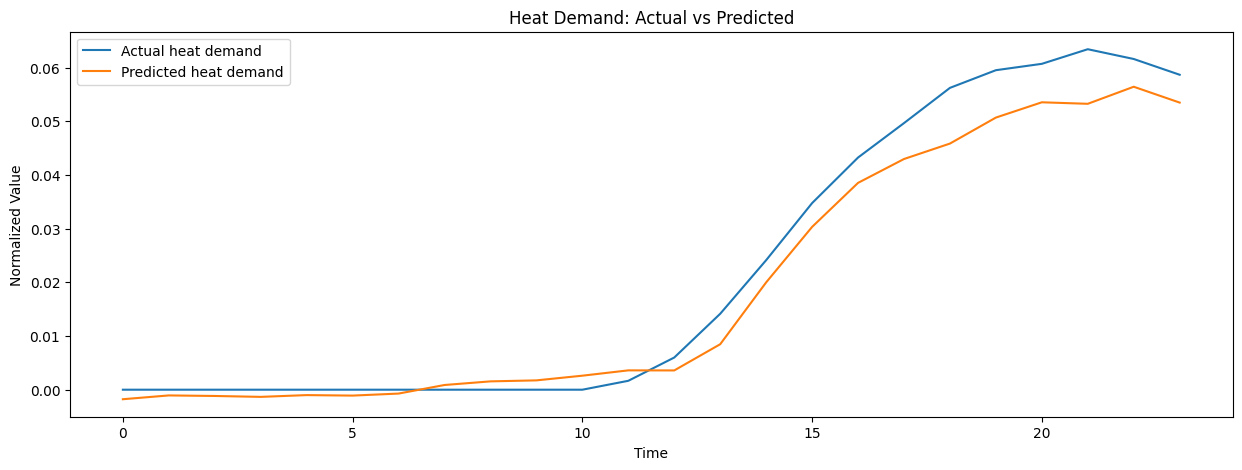

In [45]:
# Plot actual vs predicted values
plt.figure(figsize=(15, 5))
plt.plot(y_test[:24, 0], label="Actual electricity demand")
plt.plot(y_pred[:24, 0], label="Predict ed electricity demand")
plt.title("Electricity Demand: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Normalized Value")
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(y_test[:24, 1], label="Actual heat demand")
plt.plot(y_pred[:24, 1], label="Predicted heat demand")
plt.title("Heat Demand: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Normalized Value")
plt.legend()
plt.show()

In [46]:
# Crete denormalized actual and predicted values, respectively.
electricity_demand_idx = data.columns.get_loc("electricity_demand_values[kw]")
heat_demand_idx = data.columns.get_loc("heat_demand_values[kw]")


target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit(data.iloc[:, [electricity_demand_idx, heat_demand_idx]])

y_test_denorm = target_scaler.inverse_transform(y_test)
y_pred_denorm = target_scaler.inverse_transform(y_pred)

Index 0: Actual [electricity, heat] = [192.82, 0.00], Predicted [electricity, heat] = [213.91, -2.71]
Index 1: Actual [electricity, heat] = [187.17, 0.00], Predicted [electricity, heat] = [209.47, -1.63]
Index 2: Actual [electricity, heat] = [187.59, 0.00], Predicted [electricity, heat] = [211.77, -1.79]
Index 3: Actual [electricity, heat] = [185.99, 0.00], Predicted [electricity, heat] = [210.59, -2.04]
Index 4: Actual [electricity, heat] = [182.71, 0.00], Predicted [electricity, heat] = [208.34, -1.54]
Index 5: Actual [electricity, heat] = [182.83, 0.00], Predicted [electricity, heat] = [209.89, -1.68]
Index 6: Actual [electricity, heat] = [194.29, 0.00], Predicted [electricity, heat] = [208.91, -1.10]
Index 7: Actual [electricity, heat] = [222.48, 0.00], Predicted [electricity, heat] = [224.84, 1.34]
Index 8: Actual [electricity, heat] = [256.94, 0.00], Predicted [electricity, heat] = [260.79, 2.37]
Index 9: Actual [electricity, heat] = [292.73, 0.00], Predicted [electricity, heat] 

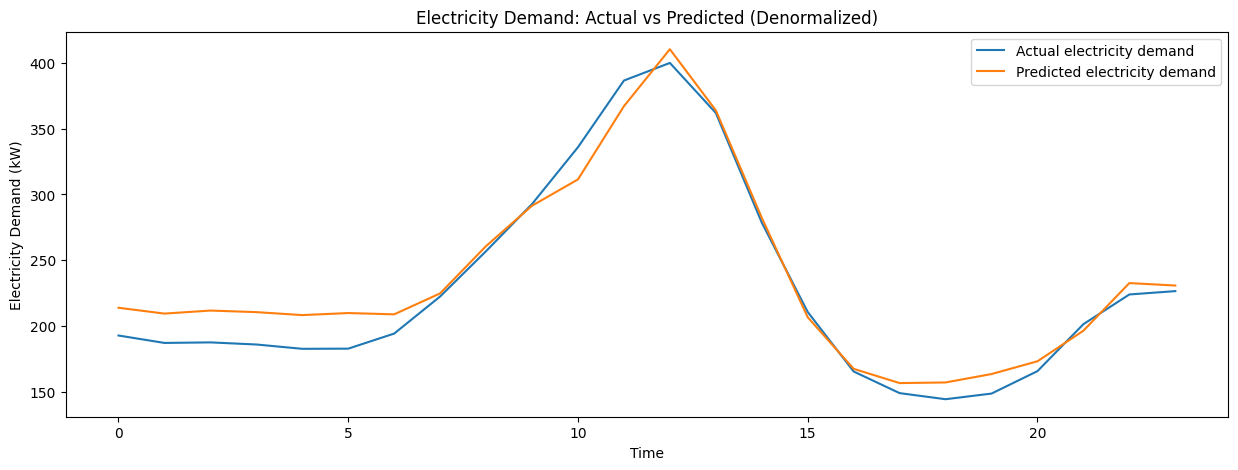

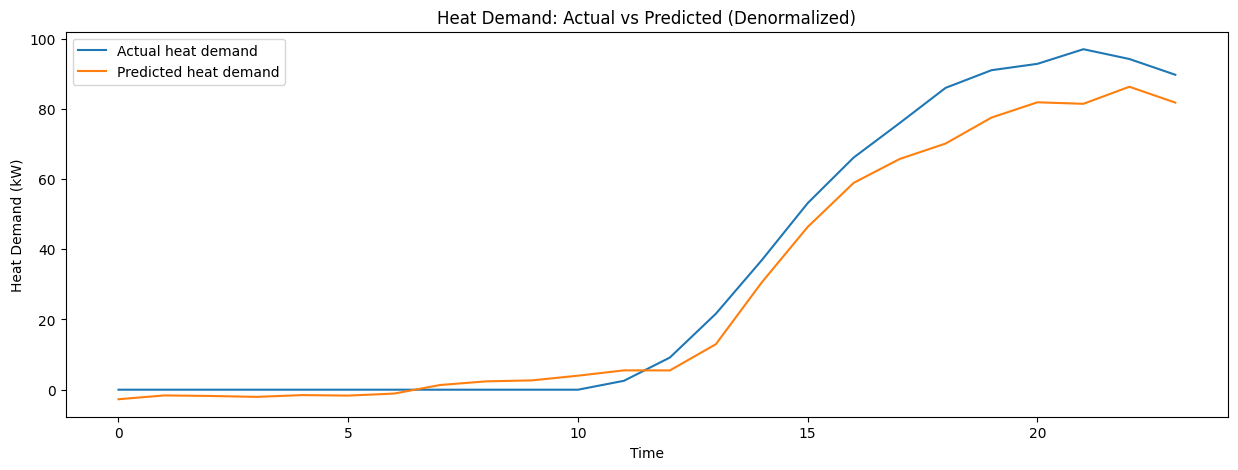

In [61]:
# Print some denormalized actual and predicted values for comparison
i_range = range(13731)

for i in i_range:
    print(f"Index {i}: Actual [electricity, heat] = [{y_test_denorm[i, 0]:.2f}, {y_test_denorm[i, 1]:.2f}], Predicted [electricity, heat] = [{y_pred_denorm[i, 0]:.2f}, {y_pred_denorm[i, 1]:.2f}]")

# Plot actual vs predicted values for denormalized data
plt.figure(figsize=(15, 5))
plt.plot(y_test_denorm[:24, 0], label="Actual electricity demand")
plt.plot(y_pred_denorm[:24, 0], label="Predicted electricity demand")
plt.title("Electricity Demand: Actual vs Predicted (Denormalized)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand (kW)")
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(y_test_denorm[:24, 1], label="Actual heat demand")
plt.plot(y_pred_denorm[:24, 1], label="Predicted heat demand")
plt.title("Heat Demand: Actual vs Predicted (Denormalized)")
plt.xlabel("Time")
plt.ylabel("Heat Demand (kW)")
plt.legend()
plt.show()

1/1 [==============================] - 0s 31ms/step


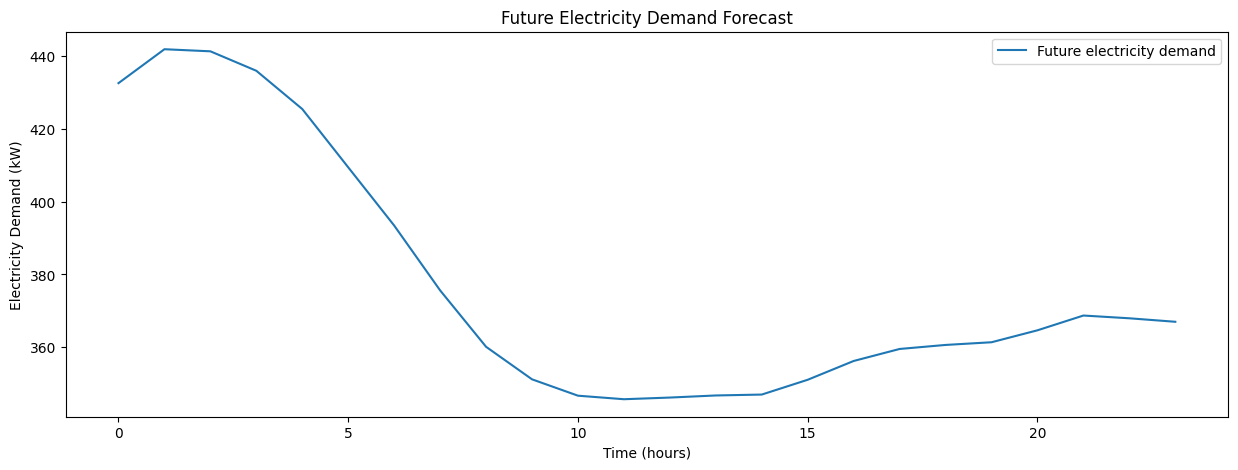

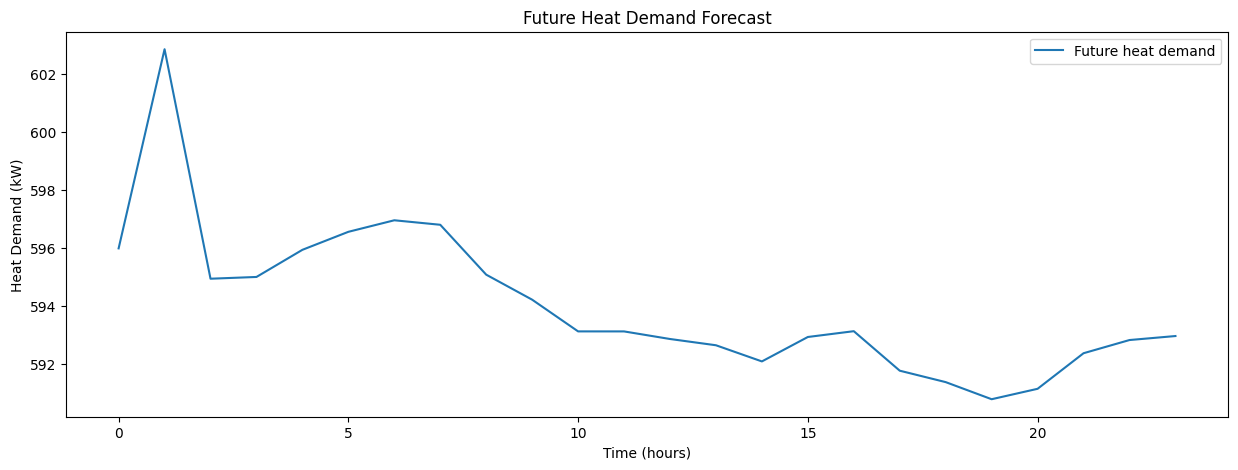

In [59]:
def forecast_future(model, input_seq, n_future_steps):
    future_predictions = []
    input_seq = input_seq.copy()
    
    for _ in range(n_future_steps):
        next_step_prediction = model.predict(input_seq[np.newaxis, :, :])
        future_predictions.append(next_step_prediction[0])
        
        
        input_seq = input_seq[1:, :]
        
        
        input_seq = np.vstack((input_seq, np.hstack((next_step_prediction.reshape(1, -1), input_seq[-1, 2:].reshape(1, -1)))))
    
    return np.array(future_predictions)


n_future_steps = 24 # For example next 24 hours


last_input_sequence = X_test[-1, :, :]

# Forecast future energy demand
future_predictions_norm = forecast_future(model, last_input_sequence, n_future_steps)

# Denormalize the future predictions
future_predictions_denorm = target_scaler.inverse_transform(future_predictions_norm)

# Visualize the future predictions
plt.figure(figsize=(15, 5))
plt.plot(future_predictions_denorm[:, 0], label="Future electricity demand")
plt.title("Future Electricity Demand Forecast")
plt.xlabel("Time (hours)")
plt.ylabel("Electricity Demand (kW)")
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(future_predictions_denorm[:, 1], label="Future heat demand")
plt.title("Future Heat Demand Forecast")
plt.xlabel("Time (hours)")
plt.ylabel("Heat Demand (kW)")
plt.legend()
plt.show()